# Fluxonium LCAO

In [1]:
import numpy as np
import scipy.constants as pyc

from bfqcircuits.core import fluxonium as flx
from bfqcircuits.core import fluxonium_LCAO as flc

import matplotlib.pyplot as plt

In [2]:
fluxonium = flx.Fluxonium()
fluxonium_LCAO = flc.FluxoniumLCAO()

In [3]:
L = 2e-6
C = 2e-15
Ej = 20.0

fluxonium.set_parameters(L=L, C=C, Ej=Ej)
fluxonium.calc_hamiltonian_parameters()

fluxonium_LCAO.set_parameters(L=L, C=C, Ej=Ej)
fluxonium_LCAO.calc_hamiltonian_parameters()
print(fluxonium_LCAO.__repr__())

L = 2.0000e-06
C = 2.0000e-15
Ec = 7.7481e+01
El = 8.1731e-02
Ej = 2.0000e+01
Ejs = 0.0000e+00
Ejd = 0.0000e+00
w = 2.5165e+00
wj = 3.9365e+01
u = 8.8023e+00
Z = 4.9003e+00
flux_zpf = 6.2446e-01
charge_zpf = 1.2743e-01



1.4916318279086056
1.5140829477194617


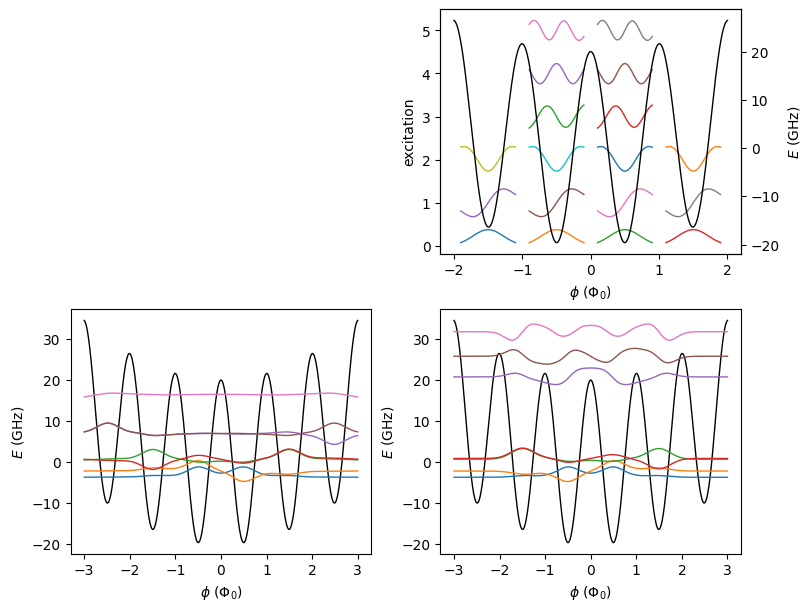

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(8, 6), constrained_layout=True)
ax[0, 0].axis("off")

fluxonium.set_parameters(p_ext=1.0 * np.pi, N=60)
fluxonium.diagonalize_hamiltonian()
fluxonium.plot_fluxonium(ax[1, 0], 7, x_range=3.0, fill_between=False)

fluxonium_LCAO.set_parameters(p_ext=1.0 * np.pi)
fluxonium_LCAO.create_states([(-1, 2), (-1, 2), (-1, 2), (0, 1), (0, 1), (0, 1)])
fluxonium_LCAO.plot_states(ax[0, 1])

fluxonium_LCAO.diagonalize_hamiltonian()
fluxonium_LCAO.plot_fluxonium(ax[1, 1], 7, x_range=3.0, fill_between=False)

print(fluxonium.E[1] - fluxonium.E[0])
print(fluxonium_LCAO.E[1] - fluxonium_LCAO.E[0])

plt.show()

## Convergence

30


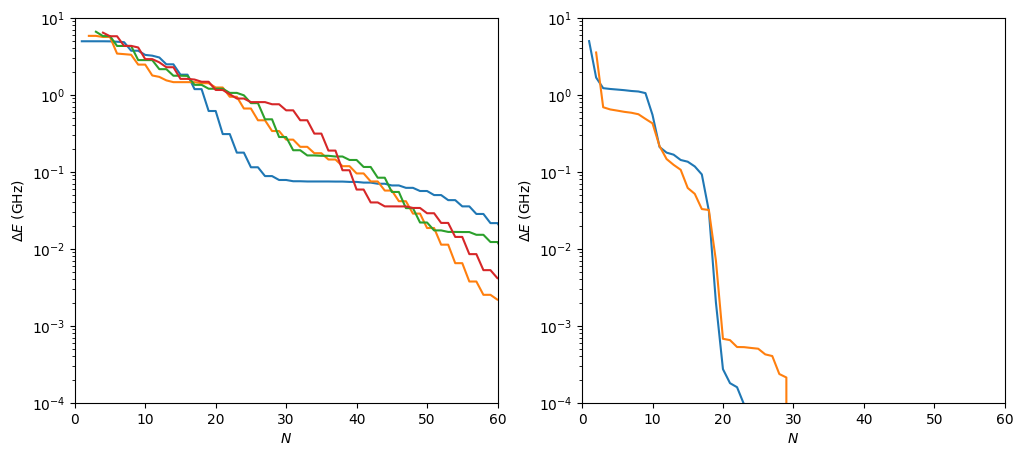

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

fluxonium.convergence_sweep(70)
fluxonium.plot_convergence_sweep(ax[0], 4)

ax[0].set_xlim(0, 60)
ax[0].set_yscale("log")
ax[0].set_ylim(1e-4, 10)

###
states = [(-1, 2)] * 5
states.extend([(0, 1)] * 5)   # with more states it becomes numerically unstable
fluxonium_LCAO.create_states(states)
print(fluxonium_LCAO.N)

fluxonium_LCAO.convergence_sweep(fluxonium_LCAO.N)
fluxonium_LCAO.plot_convergence_sweep(ax[1], 2)

ax[1].set_xlim(0, 60)
ax[1].set_yscale("log")
ax[1].set_ylim(1e-4, 10)

plt.show()

## Flux sweep

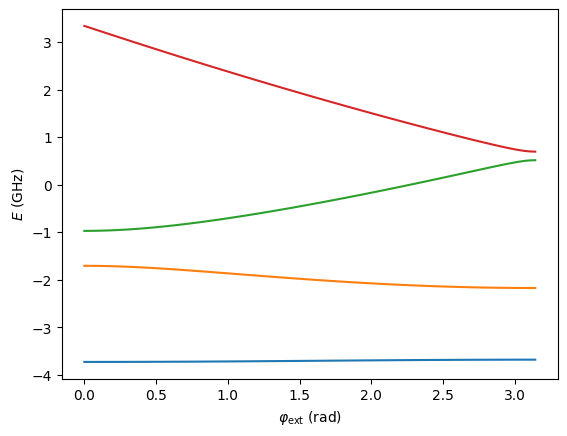

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)

fluxonium_LCAO.create_states([(-2, 3)] * 5)
fluxonium_LCAO.sweep_external_flux(np.linspace(0.0, np.pi, 101))
fluxonium_LCAO.substract_groundstate_energy_sweep()
fluxonium_LCAO.plot_energy_sweep(ax, np.arange(4))

fluxonium.sweep_external_flux(np.linspace(0.0, np.pi, 101))
fluxonium.substract_groundstate_energy_sweep()

ax.set_xlabel(r"$\varphi_\text{ext}$ (rad)")

plt.show()

## Matrix elements and losses

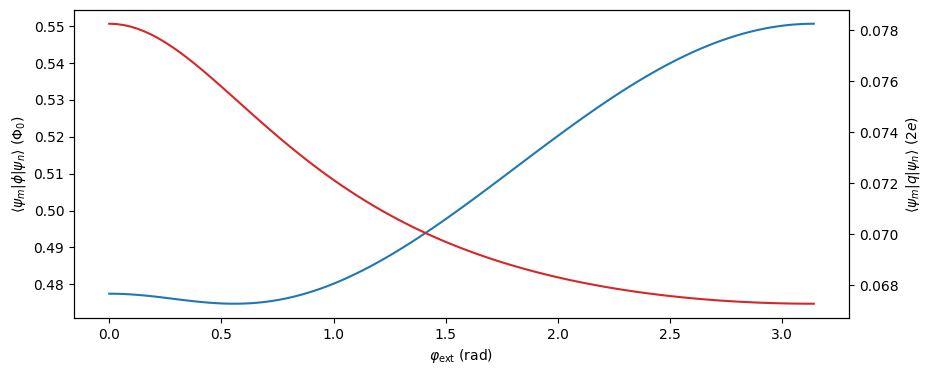

In [10]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)

flux_dm, charge_dm = fluxonium_LCAO.calc_dipole_moments_sweep(0, 1)

ax.plot(fluxonium_LCAO.par_sweep, flux_dm, color="C0")
ax.set_xlabel(r"$\varphi_\text{ext}$ (rad)")
ax.set_ylabel(r"$\langle \psi_m|\phi| \psi_n\rangle$ ($\Phi_0$)")

axt = ax.twinx()
axt.plot(fluxonium_LCAO.par_sweep, charge_dm, color="C3")
axt.set_ylabel(r"$\langle \psi_m|q| \psi_n\rangle$ ($2e$)")

#flux_dm, charge_dm = fluxonium.calc_dipole_moments_sweep(0, 1)
#ax.plot(fluxonium_LCAO.par_sweep, flux_dm, color="C0")
#axt.plot(fluxonium_LCAO.par_sweep, charge_dm, color="C3")

plt.show()

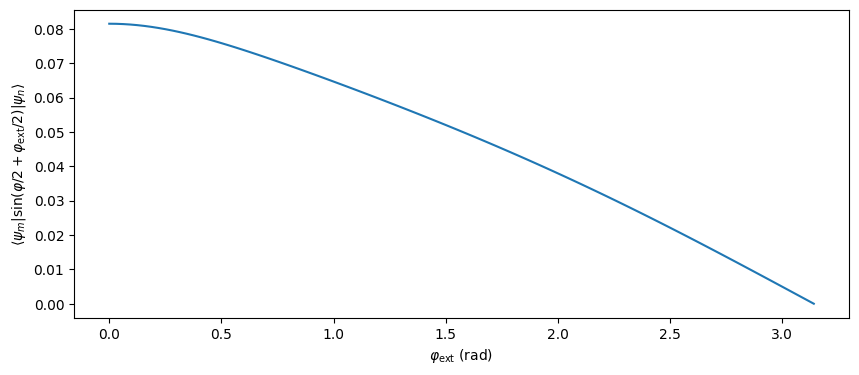

In [11]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)

sin_mel = fluxonium_LCAO.calc_sin_phi_over_two_sweep(0, 1)
ax.plot(fluxonium.par_sweep, sin_mel)

#sin_mel = fluxonium.calc_sin_phi_over_two_sweep(0, 1)
#ax.plot(fluxonium.par_sweep, sin_mel

ax.set_xlabel(r"$\varphi_\text{ext}$ (rad)")
ax.set_ylabel(r"$\langle \psi_m|\sin(\varphi /2 + \varphi_\text{ext} / 2)| \psi_n\rangle$")

plt.show()

### Inductive loss

In [12]:
Q_ind = 1e6 # inductive loss quality factor
T = 25.0 # in [mK]

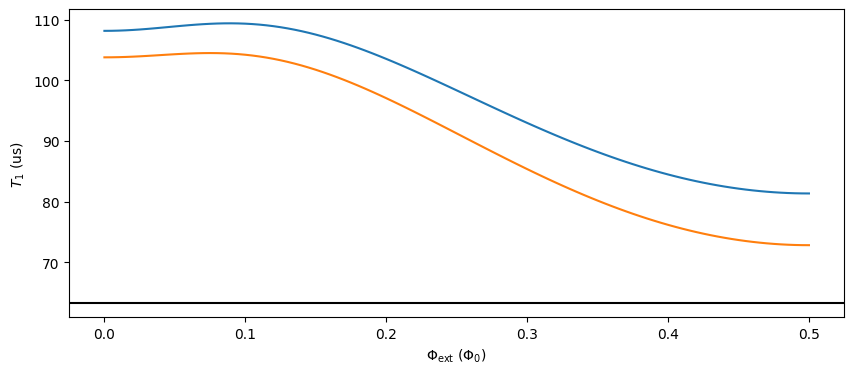

In [13]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)

G1_TLSs = fluxonium_LCAO.calc_inductive_loss_sweep(1, 0, Q_ind, environment="TLSs")
G1_bosonic = fluxonium_LCAO.calc_inductive_loss_sweep(1, 0, Q_ind, environment="Bosonic", T=T)

ax.plot(fluxonium_LCAO.par_sweep / (2 * np.pi), 1 / G1_TLSs)
ax.plot(fluxonium_LCAO.par_sweep / (2 * np.pi), 1 / G1_bosonic)
ax.axhline(1e6 * Q_ind / (2e9 * np.pi * fluxonium_LCAO.w), color="k")  # harmonic oscillator

ax.set_xlabel(r"$\Phi_\mathrm{ext}$ ($\Phi_0$)")
ax.set_ylabel("$T_1$ (us)")

plt.show()

### Capacitive loss

In [14]:
Q_cap = 1e6 # inductive loss quality factor
T = 25.0 # in [mK]

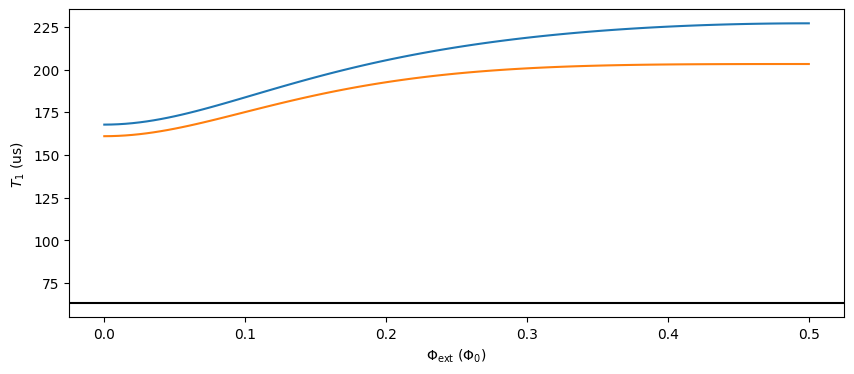

In [15]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)

G1_TLSs = fluxonium_LCAO.calc_capacitive_loss_sweep(1, 0, Q_cap, environment="TLSs")
G1_bosonic = fluxonium_LCAO.calc_capacitive_loss_sweep(1, 0, Q_cap, environment="Bosonic", T=T)

ax.plot(fluxonium_LCAO.par_sweep / (2 * np.pi), 1 / G1_TLSs)
ax.plot(fluxonium_LCAO.par_sweep / (2 * np.pi), 1 / G1_bosonic)
ax.axhline(1e6 * Q_ind / (2e9 * np.pi * fluxonium_LCAO.w), color="k")  # harmonic oscillator

ax.set_xlabel(r"$\Phi_\mathrm{ext}$ ($\Phi_0$)")
ax.set_ylabel("$T_1$ (us)")

plt.show()

## More
- for more examples see Fluxonium notebook.